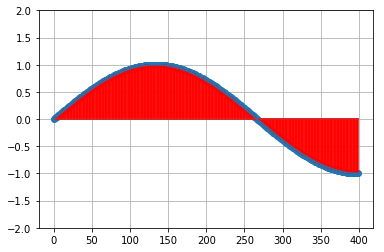

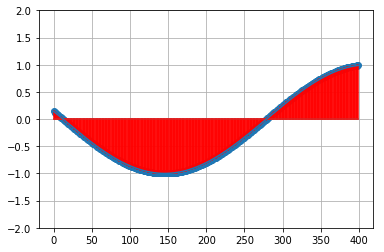

sig= 6.917854385822338e-05
embarrassingly_parallel
parallel class...
fitting shard  0
working on model  probit_sin_wave
fitting shard  1
working on model  probit_sin_wave
fitting shard  2
working on model  probit_sin_wave
fitting shard  3
working on model  probit_sin_wave
particle_filter
working on model  probit_sin_wave
CMC
parallel class...
fitting shard  0
working on model  probit_sin_wave
fitting shard  1
working on model  probit_sin_wave
fitting shard  2
working on model  probit_sin_wave
fitting shard  3
working on model  probit_sin_wave
1
2
3
CMC_wass
parallel class...
fitting shard  0
working on model  probit_sin_wave
fitting shard  1
working on model  probit_sin_wave
fitting shard  2
working on model  probit_sin_wave
fitting shard  3
working on model  probit_sin_wave
computing waserstein barrycenter...
collecting parameter info from shards...
data successfully prepared...
machine weights:  [0.44  0.065 0.355 0.14 ]
1
computing waserstein barrycenter...
collecting parameter info

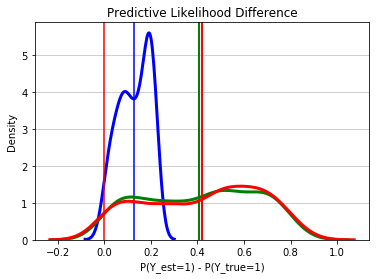

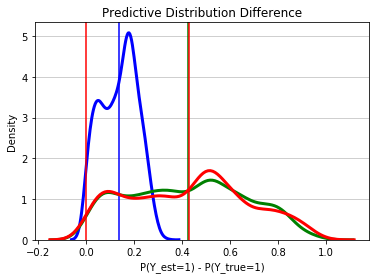

In [4]:
import numpy as np

import particle_filter
import simulate_data
import embarrassingly_parallel
import pf_plots 
import matplotlib.pyplot as plt

run_num = 1

M=4
PART_NUM=10
epoch_at=[99,199,299,399]#[49,75,99,124,149,174,199,224,249,275,299,324,349,374,389,399]
params={'N': 100*M, 
        'N_batch':1, 
        'omega_shift' : [0,3], 
        'shards': M,
        'epoch_at':epoch_at,
        'particles_per_shard':PART_NUM,
        'model':'probit_sin_wave',
        'sample_method':"importance"}

par_run=list()
single_run=list()
cmc_run=list()
cmc_wass_run=list()

for rt in range(run_num):
    
    if rt == 0:
        test, params = simulate_data.temp_make_data_function(params, model='probit_sin_wave', show=True)
    else:        
        test, params = simulate_data.temp_make_data_function(params, model='probit_sin_wave', show=False)
    
    print("embarrassingly_parallel")
    parcobj=embarrassingly_parallel.embarrassingly_parallel(test, params)
    parcobj.shuffel_embarrassingly_parallel_particles()
    print("particle_filter")
    pfo = particle_filter.particle_filter(test, params['particles_per_shard'], model='probit_sin_wave', sample_method="importance")
    pfo.run_particle_filter()
    print("CMC")
    cmcobj=embarrassingly_parallel.embarrassingly_parallel(test['epoch_data']['epoch0'], params)
    cmcobj.shuffel_embarrassingly_parallel_particles()
    for ea in range(1, len(params['epoch_at'])):
        print(ea)
        cmcobj.run_batch(test['epoch_data']['epoch'+str(ea)])
        cmcobj.shuffel_embarrassingly_parallel_particles()
    print("CMC_wass")
    cmcwassobj=embarrassingly_parallel.embarrassingly_parallel(test['epoch_data']['epoch0'], params)
    cmcwassobj.shuffel_embarrassingly_parallel_particles(method="wasserstein", wass_n=10)
    for ea in range(1, len(params['epoch_at'])):
        print(ea)
        cmcwassobj.run_batch(test['epoch_data']['epoch'+str(ea)])
        cmcwassobj.shuffel_embarrassingly_parallel_particles(method="wasserstein", wass_n=10)    
    
    single_run.append(pfo)
    par_run.append(parcobj)
    cmc_run.append(cmcobj)
    cmc_wass_run.append(cmcwassobj)
    
    #cmcobj.plot_CMC_parameter_path(1)
    #parcobj.plot_parameter_path(1)
    #pfo.plot_particle_path(1)
    
plot_thing=pf_plots.pf_plots()
plot_thing.plot_pred_lik_diff_3_way_experiment_run(single_run, par_run, cmc_run,  test)#, run_num)

In [1]:
epochs2=[199,399]
epochs8=[49,99,149,199,249,299,349,399]
epochs16=[24,49,74,99,124,149,174,199,224,249,274,299,324,349,374,399]
te=list(range(0,400,10))
te.append(399)
epochs40=te

In [2]:
import numpy as np

import particle_filter
import simulate_data
import embarrassingly_parallel
import pf_plots 
import matplotlib.pyplot as plt

run_total = 20

M=4
PART_NUM=1000
epoch_at=epochs2
params={'N': 100*M, 
        'N_batch':1, 
        'omega_shift' : [0,3], 
        'shards': M,
        'epoch_at':epoch_at,
        'particles_per_shard':PART_NUM,
        'model':'probit_sin_wave',
        'sample_method':"importance"}

par_run=list()
single_run=list()
cmc_run=list()

for rt in range(run_total):
    
    if rt == 0:
        test, params = simulate_data.temp_make_data_function(params, model='probit_sin_wave', show=True)
    else:        
        test, params = simulate_data.temp_make_data_function(params, model='probit_sin_wave', show=False)

    parcobj=embarrassingly_parallel.embarrassingly_parallel(test, params)
    parcobj.shuffel_embarrassingly_parallel_particles()

    pfo = particle_filter.particle_filter(test, params['particles_per_shard'], model='probit_sin_wave', sample_method="importance")
    pfo.run_particle_filter()
    
    cmcobj=embarrassingly_parallel.embarrassingly_parallel(test['epoch_data']['epoch0'], params)
    cmcobj.shuffel_embarrassingly_parallel_particles()
    for ea in range(1, len(params['epoch_at'])):
        cmcobj.run_batch(test['epoch_data']['epoch'+str(ea)])
        cmcobj.shuffel_embarrassingly_parallel_particles()
    
    single_run.append(pfo)
    par_run.append(parcobj)
    cmc_run.append(cmcobj)
    
    #cmcobj.plot_CMC_parameter_path(1)
    #parcobj.plot_parameter_path(1)
    #pfo.plot_particle_path(1)

let's plot some particle filters!


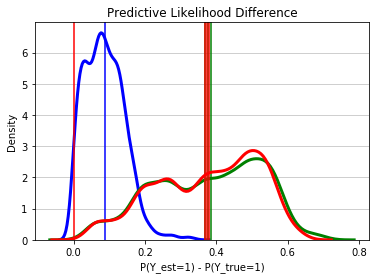

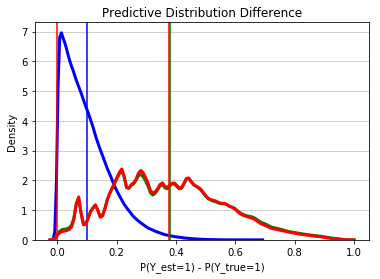

In [4]:
plot_thing=pf_plots.pf_plots()
plot_thing.plot_pred_lik_diff_3_way_experiment_run(single_run, par_run, cmc_run,  test)

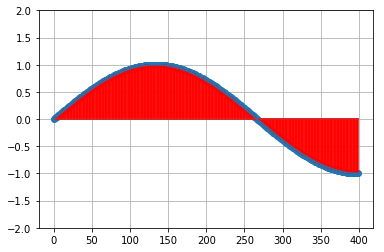

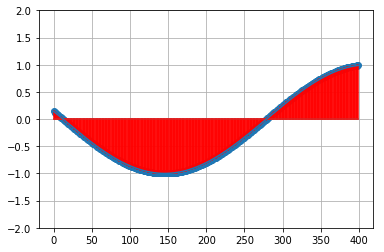

sig= 6.917854385822338e-05
parallel class...
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
parallel class...
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
sig= 6.917854385822338e-05
parallel class...
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
parallel class...
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
sig= 6.917854385822338e-05
parallel class...
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
parallel class...
working on model  probit_sin_

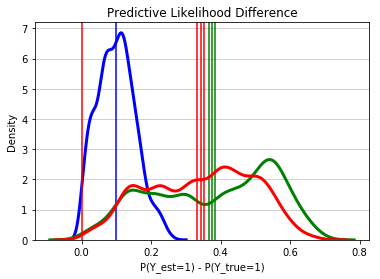

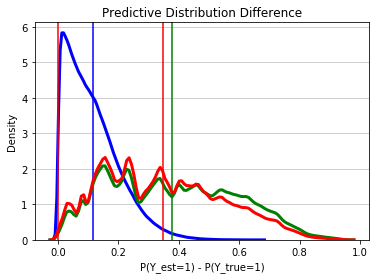

In [5]:
import numpy as np

import particle_filter
import simulate_data
import embarrassingly_parallel
import pf_plots 
import matplotlib.pyplot as plt

run_total = 20

M=4
PART_NUM=1000
epoch_at=epochs8
params={'N': 100*M, 
        'N_batch':1, 
        'omega_shift' : [0,3], 
        'shards': M,
        'epoch_at':epoch_at,
        'particles_per_shard':PART_NUM,
        'model':'probit_sin_wave',
        'sample_method':"importance"}

par_run=list()
single_run=list()
cmc_run=list()

for rt in range(run_total):
    
    if rt == 0:
        test, params = simulate_data.temp_make_data_function(params, model='probit_sin_wave', show=True)
    else:        
        test, params = simulate_data.temp_make_data_function(params, model='probit_sin_wave', show=False)

    parcobj=embarrassingly_parallel.embarrassingly_parallel(test, params)
    parcobj.shuffel_embarrassingly_parallel_particles()

    pfo = particle_filter.particle_filter(test, params['particles_per_shard'], model='probit_sin_wave', sample_method="importance")
    pfo.run_particle_filter()
    
    cmcobj=embarrassingly_parallel.embarrassingly_parallel(test['epoch_data']['epoch0'], params)
    cmcobj.shuffel_embarrassingly_parallel_particles()
    for ea in range(1, len(params['epoch_at'])):
        cmcobj.run_batch(test['epoch_data']['epoch'+str(ea)])
        cmcobj.shuffel_embarrassingly_parallel_particles()
    
    single_run.append(pfo)
    par_run.append(parcobj)
    cmc_run.append(cmcobj)
    
    #cmcobj.plot_CMC_parameter_path(1)
    #parcobj.plot_parameter_path(1)
    #pfo.plot_particle_path(1)
    
plot_thing=pf_plots.pf_plots()
plot_thing.plot_pred_lik_diff_3_way_experiment_run(single_run, par_run, cmc_run,  test)

In [1]:
import numpy as np

import particle_filter
import simulate_data
import embarrassingly_parallel
import pf_plots 
import matplotlib.pyplot as plt

run_total = 20

M=4
PART_NUM=1000
epoch_at=epochs16
params={'N': 100*M, 
        'N_batch':1, 
        'omega_shift' : [0,3], 
        'shards': M,
        'epoch_at':epoch_at,
        'particles_per_shard':PART_NUM,
        'model':'probit_sin_wave',
        'sample_method':"importance"}

par_run=list()
single_run=list()
cmc_run=list()

for rt in range(run_total):
    
    if rt == 0:
        test, params = simulate_data.temp_make_data_function(params, model='probit_sin_wave', show=True)
    else:        
        test, params = simulate_data.temp_make_data_function(params, model='probit_sin_wave', show=False)

    parcobj=embarrassingly_parallel.embarrassingly_parallel(test, params)
    parcobj.shuffel_embarrassingly_parallel_particles()

    pfo = particle_filter.particle_filter(test, params['particles_per_shard'], model='probit_sin_wave', sample_method="importance")
    pfo.run_particle_filter()
    
    cmcobj=embarrassingly_parallel.embarrassingly_parallel(test['epoch_data']['epoch0'], params)
    cmcobj.shuffel_embarrassingly_parallel_particles()
    for ea in range(1, len(params['epoch_at'])):
        cmcobj.run_batch(test['epoch_data']['epoch'+str(ea)])
        cmcobj.shuffel_embarrassingly_parallel_particles()
    
    single_run.append(pfo)
    par_run.append(parcobj)
    cmc_run.append(cmcobj)
    
    #cmcobj.plot_CMC_parameter_path(1)
    #parcobj.plot_parameter_path(1)
    #pfo.plot_particle_path(1)
    
plot_thing=pf_plots.pf_plots()
plot_thing.plot_pred_lik_diff_3_way_experiment_run(single_run, par_run, cmc_run,  test)

NameError: name 'epochs16' is not defined

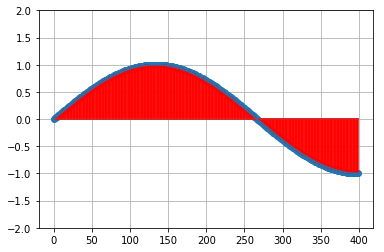

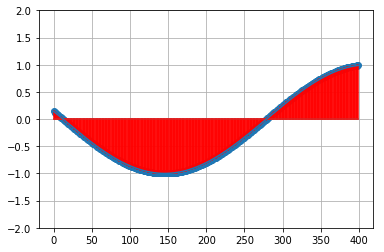

sig= 6.917854385822338e-05
parallel class...
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
parallel class...
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
sig= 6.917854385822338e-05
parallel class...
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
parallel class...
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
sig= 6.917854385822338e-05
parallel class...
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
working on model  probit_sin_wave
parallel class...
working on model  probit_sin_

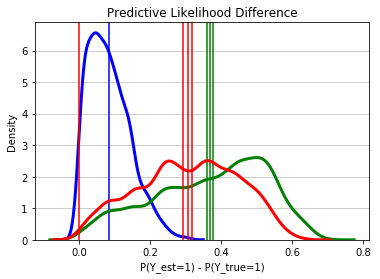

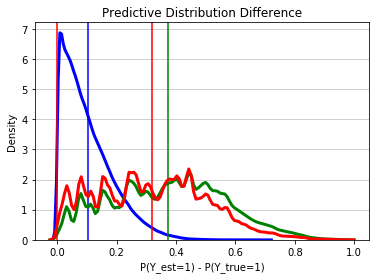

In [7]:
import numpy as np

import particle_filter
import simulate_data
import embarrassingly_parallel
import pf_plots 
import matplotlib.pyplot as plt

run_total = 20

M=4
PART_NUM=1000
epoch_at=epochs40
params={'N': 100*M, 
        'N_batch':1, 
        'omega_shift' : [0,3], 
        'shards': M,
        'epoch_at':epoch_at,
        'particles_per_shard':PART_NUM,
        'model':'probit_sin_wave',
        'sample_method':"importance"}

par_run=list()
single_run=list()
cmc_run=list()

for rt in range(run_total):
    
    if rt == 0:
        test, params = simulate_data.temp_make_data_function(params, model='probit_sin_wave', show=True)
    else:        
        test, params = simulate_data.temp_make_data_function(params, model='probit_sin_wave', show=False)

    parcobj=embarrassingly_parallel.embarrassingly_parallel(test, params)
    parcobj.shuffel_embarrassingly_parallel_particles()

    pfo = particle_filter.particle_filter(test, params['particles_per_shard'], model='probit_sin_wave', sample_method="importance")
    pfo.run_particle_filter()
    
    cmcobj=embarrassingly_parallel.embarrassingly_parallel(test['epoch_data']['epoch0'], params)
    cmcobj.shuffel_embarrassingly_parallel_particles()
    for ea in range(1, len(params['epoch_at'])):
        cmcobj.run_batch(test['epoch_data']['epoch'+str(ea)])
        cmcobj.shuffel_embarrassingly_parallel_particles()
    
    single_run.append(pfo)
    par_run.append(parcobj)
    cmc_run.append(cmcobj)
    
    #cmcobj.plot_CMC_parameter_path(1)
    #parcobj.plot_parameter_path(1)
    #pfo.plot_particle_path(1)
    
plot_thing=pf_plots.pf_plots()
plot_thing.plot_pred_lik_diff_3_way_experiment_run(single_run, par_run, cmc_run,  test)

In [9]:
te=list(range(0,400,10))
te.append(399)
epoch40=te

te=list(range(0,400,5))
te.append(399)
epoch80=te

te=list(range(0,400,1))
epoch_every_obs=te


[0,
 10,
 20,
 30,
 40,
 50,
 60,
 70,
 80,
 90,
 100,
 110,
 120,
 130,
 140,
 150,
 160,
 170,
 180,
 190,
 200,
 210,
 220,
 230,
 240,
 250,
 260,
 270,
 280,
 290,
 300,
 310,
 320,
 330,
 340,
 350,
 360,
 370,
 380,
 390,
 399]

In [12]:
list(range(0,400,1))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
